In [4]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [5]:
ang1=np.radians(90)
ang2=np.radians(175)
x0=np.array([ang1,ang2,0,0])
m1=2
m2=1
r1=1
r2=0.5
g=9.8

In [6]:
def f(t,x):
    theta1,theta2,omega1,omega2=x
    a11= (m1+m2)*r1
    a12= m2*r2*np.cos(theta1-theta2)
    a21= r1*np.cos(theta1-theta2)
    a22= r2
    b1=-(m1+m2)*g*np.sin(theta1)- \
        m2*r2*np.sin(theta1-theta2)*omega2**2
    b2= r1*np.sin(theta1-theta2)*omega1**2-\
            g*np.sin(theta2)
    A=np.array([a11,a12,a21,a22]).reshape(2,2)
    b=np.array([b1,b2])
    alpha1,alpha2=sp.linalg.solve(A,b)
    return np.array([omega1,omega2,alpha1,alpha2])

In [7]:
ans=sp.integrate.solve_ivp(f,[0,100],x0,dense_output=True)

In [22]:
t=np.linspace(0,6,2000)
X=ans.sol(t).T

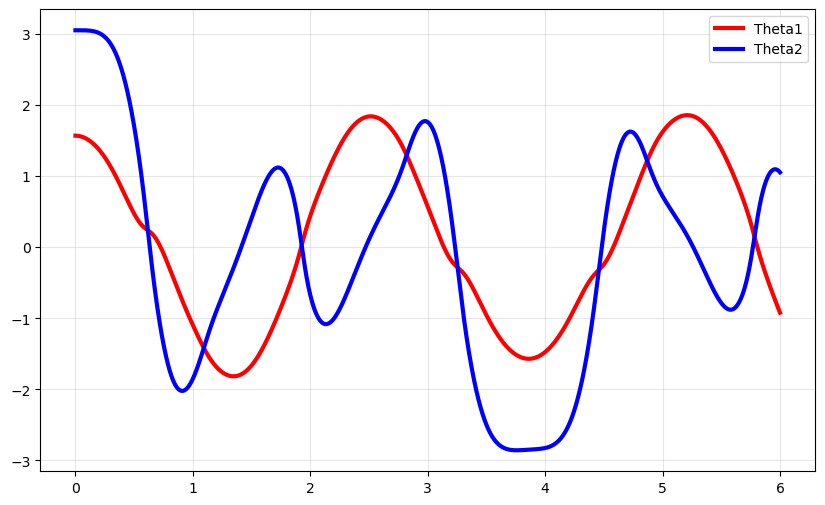

In [23]:
plt.figure(figsize=(10,6))
plt.plot(t,X[:,0],'r-',lw=3)
plt.plot(t,X[:,1],'b-',lw=3)
plt.legend(['Theta1','Theta2'])
plt.grid(alpha=0.3)

In [24]:
theta1,theta2,omega1,omega2=X.T.copy()

In [25]:
x1=r1*np.sin(theta1)
y1=-r1*np.cos(theta1)
x2=x1+r2*np.sin(theta2)
y2=y1-r2*np.cos(theta2)

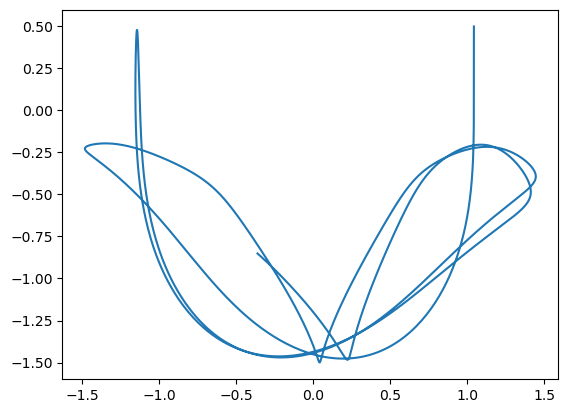

In [26]:
plt.plot(x2,y2)

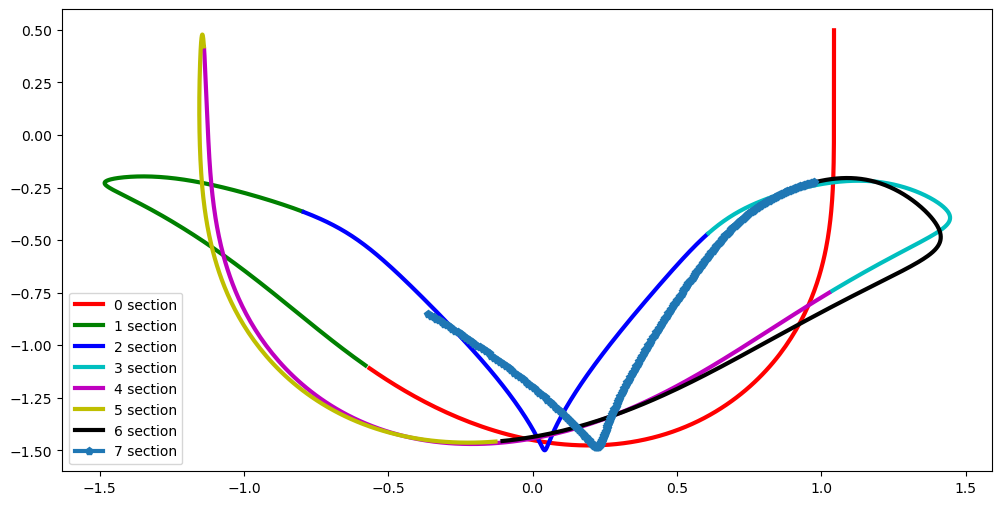

In [34]:
c=np.array(['r-','g-','b-','c-','m-','y-','k-','p-'])

plt.figure(figsize=(12,6))
for i in range(8):
    plt.plot(x2[i*250:(i+1)*250],y2[i*250:(i+1)*250],
             c[i],lw=3,label=f'{i} section')
plt.legend()

In [47]:
sol=sp.integrate.solve_ivp(f,[0,30],x0,dense_output=True)

In [73]:
t=np.linspace(0,7,3000)

In [74]:
X=sol.sol(t).T

In [75]:
X.shape

(3000, 4)

In [76]:
X[0]

array([1.57079633, 3.05432619, 0.        , 0.        ])

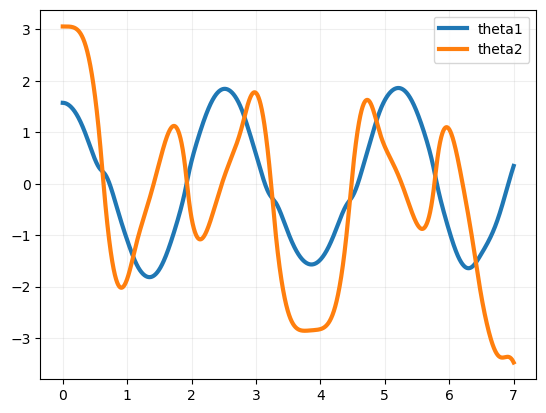

In [77]:
plt.plot(t,X[:,0],t,X[:,1],lw=3)
plt.legend(['theta1','theta2'])
plt.grid(alpha=0.2)

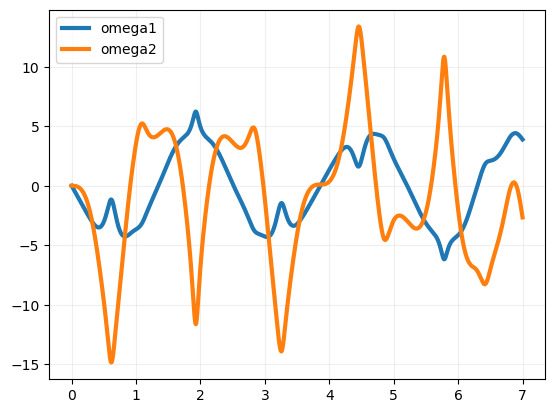

In [78]:
plt.plot(t,X[:,2],t,X[:,3],lw=3)
plt.legend(['omega1','omega2'])
plt.grid(alpha=0.2)

Text(0, 0.5, 'angular velocity of the mass one')

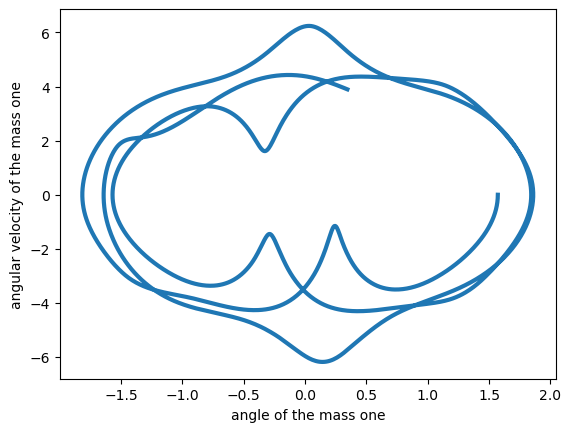

In [79]:
plt.plot(X[:,0],X[:,2],lw=3)
plt.xlabel('angle of the mass one')
plt.ylabel('angular velocity of the mass one')

Text(0, 0.5, 'angular velocity of the mass two')

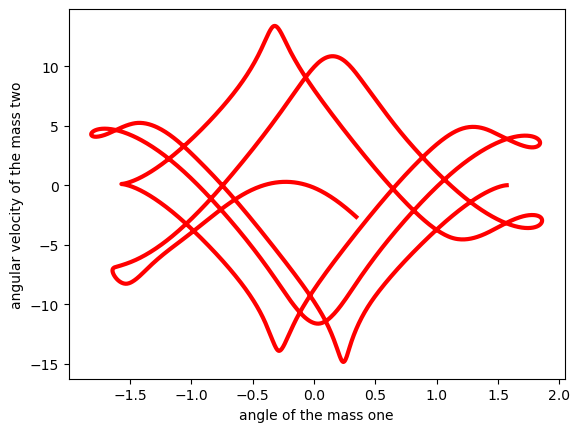

In [80]:
plt.plot(X[:,0],X[:,3],'r-',lw=3)
plt.xlabel('angle of the mass one')
plt.ylabel('angular velocity of the mass two')

Text(0, 0.5, 'angular velocity of the mass one')

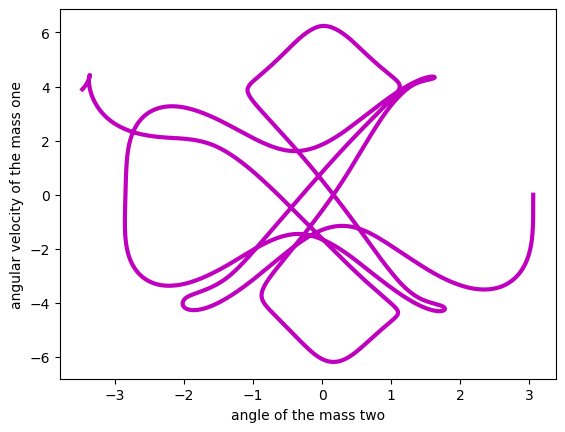

In [81]:
plt.plot(X[:,1],X[:,2],'m-',lw=3)
plt.xlabel('angle of the mass two')
plt.ylabel('angular velocity of the mass one')

Text(0, 0.5, 'angular velocity of the mass two')

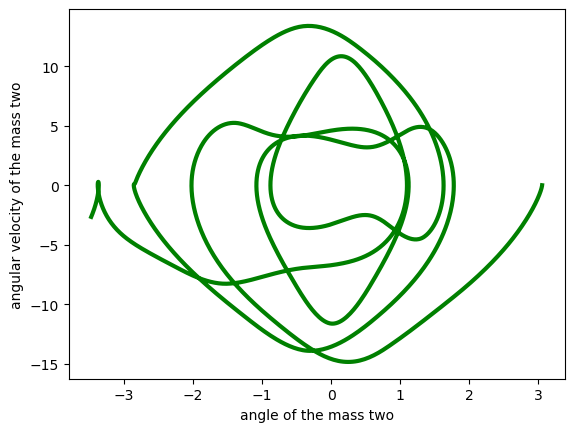

In [82]:
plt.plot(X[:,1],X[:,3],'g-',lw=3)
plt.xlabel('angle of the mass two')
plt.ylabel('angular velocity of the mass two')

In [83]:
x1=r1*np.sin(X[:,0]).copy()
y1=-r1*np.cos(X[:,0]).copy()
x2=x1+r2*np.sin(X[:,1]).copy()
y2=y1-r2*np.cos(X[:,1]).copy()

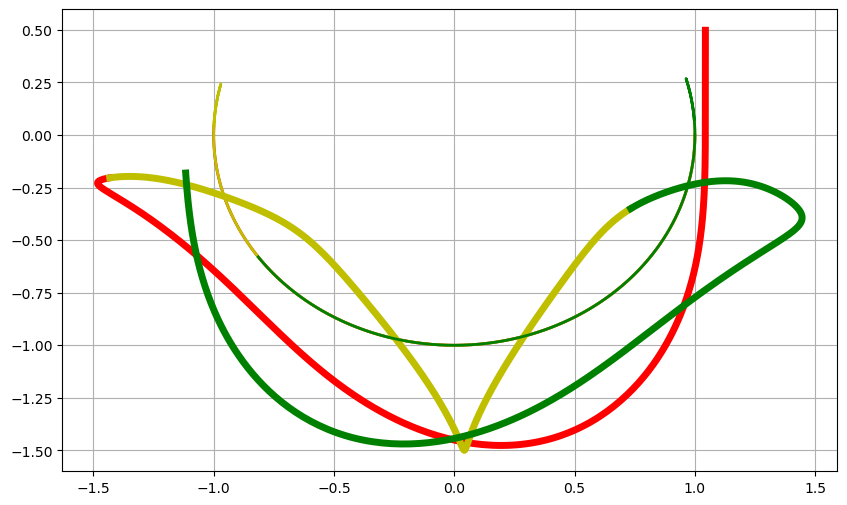

In [90]:
plt.figure(figsize=(10,6))
c=np.array(['r-','y-','g-','m-','b-','k-'])
for i in range(3):
    plt.plot(x1[i*500:(i+1)*500],y1[i*500:(i+1)*500],c[i],lw=2)
    plt.plot(x2[i*500:(i+1)*500],y2[i*500:(i+1)*500],c[i],lw=5)
plt.grid()

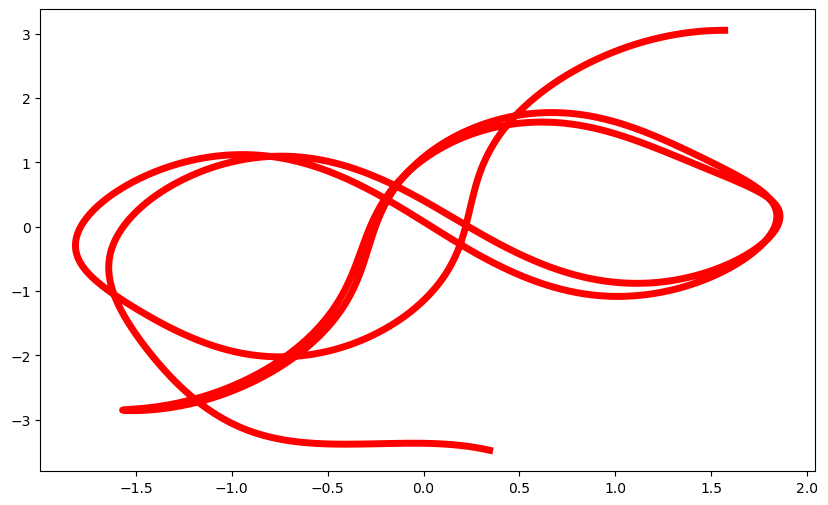

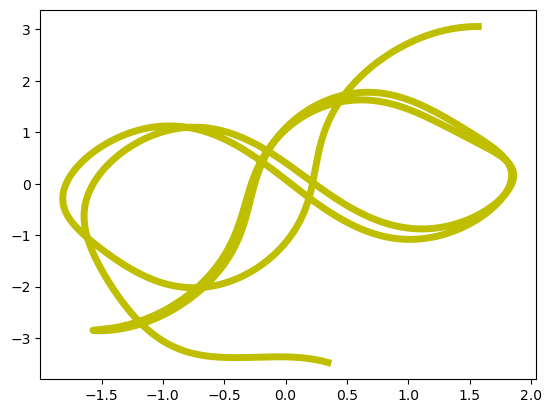

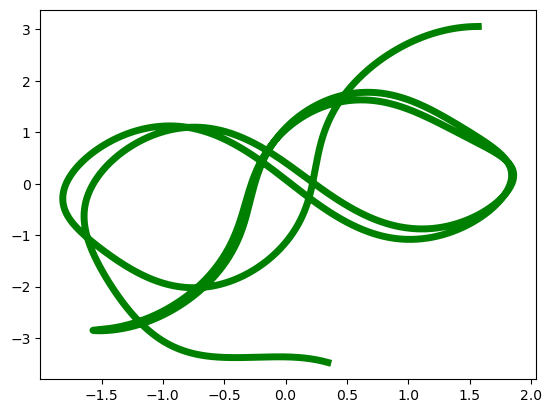

In [94]:
plt.figure(figsize=(10,6))
c=np.array(['r-','y-','g-','m-','b-','k-'])
for i in range(3):
    plt.plot(X[:,0],X[:,1],c[i],lw=5)
    plt.show()


In [95]:
np.sqrt((x1-x2)**2+(y1-y2)**2)

array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5])